In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [2]:
df_tarin = pd.read_csv('diamond-price-prediciton-2024/train.csv')
df_test = pd.read_csv('diamond-price-prediciton-2024/test.csv')
print(df_tarin.shape, df_test.shape)

(43152, 11) (10788, 10)


# get Info about data

In [3]:
df_tarin.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [4]:
df_test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [5]:
df_tarin.duplicated().sum()

0

In [6]:
df_test.duplicated().sum()

0

In [7]:
df_tarin.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df_test.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [9]:
df_tarin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


# Encode categorical and text Data

In [11]:
categorical_columns = ['cut', 'color', 'clarity']
df_train_cat = df_tarin[categorical_columns]
df_test_cat = df_test[categorical_columns]

ordinal_encoder = OrdinalEncoder()
df_train_cat_encoded = ordinal_encoder.fit_transform(df_train_cat)
df_test_cat_encoded = ordinal_encoder.transform(df_test_cat)

encoded_column_names = ordinal_encoder.get_feature_names_out(categorical_columns)

df_train_encoded = pd.DataFrame(df_train_cat_encoded, columns=encoded_column_names)
df_test_encoded = pd.DataFrame(df_test_cat_encoded, columns=encoded_column_names)

df_tarin.drop(categorical_columns, axis=1, inplace=True)
df_test.drop(categorical_columns, axis=1, inplace=True)

df_train_processed = pd.concat([df_tarin, df_train_encoded], axis=1)
df_test_processed = pd.concat([df_test, df_test_encoded], axis=1)

df_train_processed

,Id,carat,depth,table,price,x,y,z,cut,color,clarity
0,1,1.06,61.8,57.0,4270,6.57,6.60,4.07,2.0,5.0,3.0
1,2,1.51,60.9,58.0,15164,7.38,7.42,4.51,3.0,3.0,7.0
2,3,0.32,61.3,56.0,828,4.43,4.41,2.71,2.0,2.0,5.0
3,4,0.53,61.2,56.0,1577,5.19,5.22,3.19,2.0,3.0,5.0
4,5,0.70,61.0,57.0,2596,5.76,5.72,3.50,3.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
43147,43148,0.52,61.5,56.0,1760,5.16,5.18,3.18,2.0,1.0,5.0
43148,43149,0.72,62.1,59.0,3016,5.70,5.73,3.55,4.0,0.0,5.0
43149,43150,0.44,61.5,58.0,990,4.95,4.87,3.02,3.0,5.0,6.0
43150,43151,0.31,60.2,58.0,734,4.38,4.43,2.65,3.0,1.0,4.0


In [12]:
df_test_processed

,Id,carat,depth,table,x,y,z,cut,color,clarity
0,1,0.34,61.1,57.0,4.52,4.48,2.75,2.0,3.0,7.0
1,2,0.71,62.7,58.0,5.74,5.68,3.58,3.0,1.0,5.0
2,3,0.44,62.8,56.0,4.83,4.88,3.05,4.0,5.0,4.0
3,4,0.81,60.1,59.0,6.09,6.03,3.65,3.0,1.0,3.0
4,5,0.40,61.2,56.0,4.74,4.80,2.92,2.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...
10783,10784,0.57,60.9,56.0,5.34,5.36,3.26,2.0,4.0,4.0
10784,10785,1.05,60.8,57.0,6.65,6.58,4.02,2.0,3.0,5.0
10785,10786,0.71,62.3,55.0,5.68,5.72,3.55,2.0,1.0,6.0
10786,10787,1.11,61.0,60.0,6.68,6.66,4.07,3.0,1.0,3.0


# Look For Correlation

<Axes: >

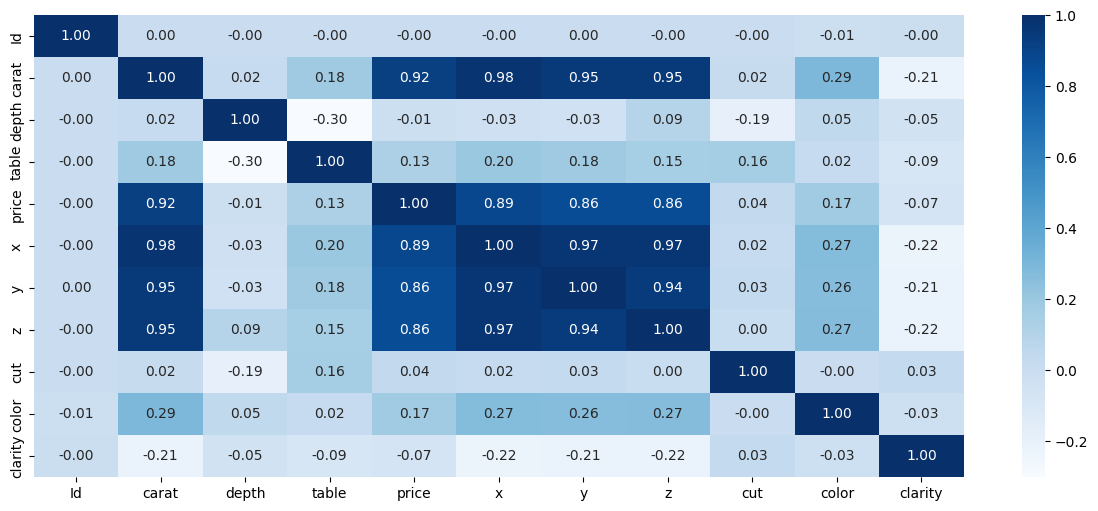

In [13]:
fig, ax = plt.subplots(figsize=(15,6))   
sns.heatmap(data=df_train_processed.corr(), annot = True , fmt=".2f",ax=ax ,cmap = "Blues")

# Remove weakly correlated data with the output

In [14]:
df_train_processed = df_train_processed.drop('Id', axis=1)
df_test_processed = df_test_processed.drop('Id', axis=1)

# Remove Outliers

In [16]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   depth    43152 non-null  float64
 2   table    43152 non-null  float64
 3   price    43152 non-null  int64  
 4   x        43152 non-null  float64
 5   y        43152 non-null  float64
 6   z        43152 non-null  float64
 7   cut      43152 non-null  float64
 8   color    43152 non-null  float64
 9   clarity  43152 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.3 MB


In [17]:
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    10788 non-null  float64
 1   depth    10788 non-null  float64
 2   table    10788 non-null  float64
 3   x        10788 non-null  float64
 4   y        10788 non-null  float64
 5   z        10788 non-null  float64
 6   cut      10788 non-null  float64
 7   color    10788 non-null  float64
 8   clarity  10788 non-null  float64
dtypes: float64(9)
memory usage: 758.7 KB


# Try with Models

In [24]:
x = df_train_processed.drop('price', axis=1)
y = df_train_processed['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [394]:
model_dc_tree = DecisionTreeRegressor()
model_dc_tree.fit(x_train, y_train)
y_pred_dc_tree = model_dc_tree.predict(x_test)
rmse_dc_tree = root_mean_squared_error(y_test, y_pred_dc_tree)
rmse_dc_tree

794.3549881408101

In [395]:
model_rd_forest = RandomForestRegressor()
model_rd_forest.fit(x_train, y_train)
y_pred_rd_forest = model_rd_forest.predict(x_test)
rmse_rd_forest = root_mean_squared_error(y_test, y_pred_rd_forest)
rmse_rd_forest

565.7967766303485

In [402]:
model_svm = svm.SVR()
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)
rmse_svm = root_mean_squared_error(y_test, y_pred_svm)
rmse_svm

4218.892481036195

# Apply Cross Validation

In [396]:
dc_tree_cv = -cross_val_score(model_dc_tree, x_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
pd.Series(dc_tree_cv).describe()

count     10.000000
mean     787.407853
std       20.022369
min      761.806237
25%      772.776041
50%      784.321163
75%      802.089949
max      816.004976
dtype: float64

In [397]:
rd_forest_cv = -cross_val_score(model_rd_forest, x_train, y_train, scoring='neg_root_mean_squared_error', cv=10)
pd.Series(rd_forest_cv).describe()

count     10.000000
mean     578.923084
std       25.313780
min      543.186331
25%      565.201453
50%      570.576016
75%      595.119122
max      623.393228
dtype: float64

# Apply Grid Search

In [ ]:
model_rd_forest = RandomForestRegressor(n_estimators=500, max_depth=6)
model_rd_forest.fit(x_train, y_train)
# x_test = df_test_processed
y_pred_rd_forest = model_rd_forest.predict(x_test)

In [26]:
rmse_rd_forest = root_mean_squared_error(y_test, y_pred_rd_forest)
rmse_rd_forest

871.2763265465283

In [23]:
price = pd.Series(y_pred_rd_forest)
price = pd.concat([price, df_tarin['Id']], axis=1)
price.to_csv('D:\\_task\\task_7\\cc.csv')